In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [15]:
dat_file = np.load('data/student.npz')
A_learn = dat_file['A_learn']
b_learn = dat_file['b_learn']
A_test = dat_file['A_test']
b_test = dat_file['b_test']


x0 = np.zeros(28)
dodes = []
dodes_x = []
i = np.random.randint(28)

# Функции
grad = lambda x,i: 2 * A_learn[i] * (A_learn[i].T @ x - b_learn[i])
fx_final = lambda x:(np.linalg.norm((A_learn @ x) - b_learn))**2
func_test = lambda x,i:(0.5 * (A_test[i].T @ x)-b_test[i])**2
t = 10000
L = max(np.linalg.eigh(A_learn.T @ A_learn)[0])


[-0.51229269 -1.93427735 -2.49282229 -0.45691407  0.54040022  1.10766206
 -0.59837061 -1.27701075  0.70983698  0.15397607 -0.64935226 -0.7363822
  0.79413814 -0.12368795 -0.35176379 -1.33826128 -0.55909077  1.4927856
  0.01583994  0.18508046 -0.1524318  -1.16885936 -0.25258532  0.55082905
 -0.48128512 -0.21207198  2.54821522  5.79484131]


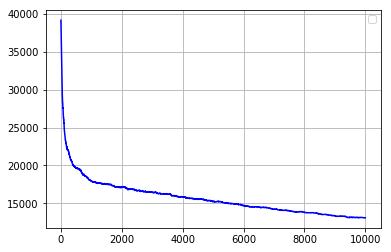

In [16]:
def sgd (grad, L, t, n, x0, fx_final):
    dodes = []
    x = x0
    x_avg = x0
    for j in range (t):
        i = np.random.randint(n)
        h = 1 / L
        grad_fx = grad(x,i)
        x = x - h * grad_fx
        x_avg = (x_avg * j + x) / (j + 1) 
        dodes.append(fx_final(x))
    return x, dodes

def show(data, namefile, legends=[],  colors=[], title="", xlabel="", ylabel=""):
    plt.figure()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    colors = iter(colors if colors else ["b", "g", "r", "go:"])
    plt.legend(tuple([plt.plot(el, next(colors)) for el in data]), tuple(legends), loc = 'best')
    plt.grid()
    plt.savefig(f'{namefile}.png', format = 'png')

dodes_x = []
test_r = []
z, dodes = sgd(getG, L, t, n, x0, fx_final)
show([dodes], namefile="graph")
